<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-et-manipulations-des-données" data-toc-modified-id="Import-et-manipulations-des-données-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import et manipulations des données</a></span><ul class="toc-item"><li><span><a href="#Import-des-bases" data-toc-modified-id="Import-des-bases-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Import des bases</a></span></li><li><span><a href="#Manipulations-des-données" data-toc-modified-id="Manipulations-des-données-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Manipulations des données</a></span></li></ul></li><li><span><a href="#Statistiques-descriptives" data-toc-modified-id="Statistiques-descriptives-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Statistiques descriptives</a></span><ul class="toc-item"><li><span><a href="#Répartition-des-individus-dans-les-modalités" data-toc-modified-id="Répartition-des-individus-dans-les-modalités-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Répartition des individus dans les modalités</a></span></li><li><span><a href="#La-variable-à-expliquer-:-&quot;Survived&quot;" data-toc-modified-id="La-variable-à-expliquer-:-&quot;Survived&quot;-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>La variable à expliquer : "Survived"</a></span></li><li><span><a href="#Les-variables-explicatives" data-toc-modified-id="Les-variables-explicatives-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Les variables explicatives</a></span><ul class="toc-item"><li><span><a href="#VARIABLES-QUANTITATIVES" data-toc-modified-id="VARIABLES-QUANTITATIVES-2.3.1"><span class="toc-item-num">2.3.1&nbsp;&nbsp;</span>VARIABLES QUANTITATIVES</a></span></li><li><span><a href="#VARIABLES-QUALITATIVES" data-toc-modified-id="VARIABLES-QUALITATIVES-2.3.2"><span class="toc-item-num">2.3.2&nbsp;&nbsp;</span>VARIABLES QUALITATIVES</a></span></li></ul></li><li><span><a href="#Création-de-variables" data-toc-modified-id="Création-de-variables-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Création de variables</a></span></li></ul></li><li><span><a href="#Modélisations" data-toc-modified-id="Modélisations-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Modélisations</a></span><ul class="toc-item"><li><span><a href="#LogisticRegression" data-toc-modified-id="LogisticRegression-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>LogisticRegression</a></span></li><li><span><a href="#Arbre-de-décision" data-toc-modified-id="Arbre-de-décision-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Arbre de décision</a></span></li><li><span><a href="#Forêt-aléatoire" data-toc-modified-id="Forêt-aléatoire-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Forêt aléatoire</a></span></li><li><span><a href="#Bagging" data-toc-modified-id="Bagging-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Bagging</a></span></li><li><span><a href="#Gradient-boosting" data-toc-modified-id="Gradient-boosting-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Gradient boosting</a></span></li></ul></li><li><span><a href="#Meilleur-modèle" data-toc-modified-id="Meilleur-modèle-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Meilleur modèle</a></span></li></ul></div>

# Analyse de la survie des passagers du Titanic

In [6]:
# On crée un chemin d'accès pour faciliter les transferts de code
#path="/Users/riwanperron/Google Drive/IAE/M2-S1/Arbre de décision sous python/"
path="C:/Users/Teo/Documents/etudes/Université/Master/master_2/Semestre 1/Machine learning sous python (Camille)/Formation ML_partager/Projet Titanic/Données/"
#path="/Users/dianethierry/Notebooks/Python Camille/Projet final Titanic/"

In [7]:
# On importe les librairies nécessaires à l'analyse
import pandas as pd
import numpy as np
from array import array
import math
import scipy.stats as stats
from statsmodels.stats import proportion as proptests
import statistics

# Data Viz
import matplotlib.pyplot as plt
import seaborn as sns

# Test Khi-2
from scipy.stats import chi2_contingency as chi2_contingency
import scipy

## Import et manipulations des données

### Import des bases

In [8]:
# Import train
train=pd.read_csv(path+"train.csv", sep=",")
train.shape
train.columns
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [9]:
# Import test
test=pd.read_csv(path+"test.csv", sep=",")
test.shape
test.columns
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


### Manipulations des données

In [10]:
# On va indexer le data frame avec la variable PassengerId pour facilité le traitement des columns:
train.set_index('PassengerId',inplace=True,drop=True)
test.set_index('PassengerId',inplace=True,drop=True)

In [11]:
#On a ainsi accès aux variables de la manière suivante:
train.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [12]:
# On commence par regarder la nature des variables
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non

**>> Valeurs manquantes**

In [13]:
# On regarde les valeurs manquantes des variables
train.isna().sum()/train.shape[0]*100

Survived     0.000000
Pclass       0.000000
Name         0.000000
Sex          0.000000
Age         19.865320
SibSp        0.000000
Parch        0.000000
Ticket       0.000000
Fare         0.000000
Cabin       77.104377
Embarked     0.224467
dtype: float64

In [14]:
# Celles du jeu test aussi
test.isna().sum()/test.shape[0]*100

Pclass       0.000000
Name         0.000000
Sex          0.000000
Age         20.574163
SibSp        0.000000
Parch        0.000000
Ticket       0.000000
Fare         0.239234
Cabin       78.229665
Embarked     0.000000
dtype: float64

**Pour le jeu train** :
A partir de la sortie précédante nous pouvons constater plusieurs choses :
* la variable sur le numéro de la cabine comporte beaucoup de valeurs manquantes (77%) mais elle nous indique sur quel 'pont' se trouvait les passagers et donc s'ils étaient proches ou pas des canots de sauvetage, en effet on peut supposer qu'il y avait une chance plus grande de survivre pour les passagers des ponts supérieurs. 

* De même, l'âge comporte 20% de NAs il arrive en effet que les personnes avec l'âge qui augmente ne souhaitent plus le renseigner. Avant de l'inclure dans nos modélisations, il faudra imputer aux valeurs manquantes la mediane pour ne pas fausser la distribution.

* Enfin, pour la variable 'Embarked' qui n'a que 2 valeurs manqantes nous deçidons de retirer les observations concernées de la base.

**Pour le jeu test** : 
* La variable Fare contient 1 seul NA, l'âge 21% et le numéro de cabine 78%. Cependant, pour pouvoir tester nos modèles sur le jeu test et soumettre sous kaggle nous ne devons supprimer aucune observation. 

+ **Variable 'Embarked'**

In [15]:
# On supprime les observations incomplètes du jeu train
    # on trouve les observations manquantes
NA_embarked_train=train[pd.isnull(train['Embarked'])]
print(NA_embarked_train)

             Survived  Pclass                                       Name  \
PassengerId                                                                
62                  1       1                        Icard, Miss. Amelie   
830                 1       1  Stone, Mrs. George Nelson (Martha Evelyn)   

                Sex   Age  SibSp  Parch  Ticket  Fare Cabin Embarked  
PassengerId                                                           
62           female  38.0      0      0  113572  80.0   B28      NaN  
830          female  62.0      0      0  113572  80.0   B28      NaN  


In [16]:
    # on les supprime
train = train.drop([62,830])
train.shape

(889, 11)

In [17]:
# Pour le jeu test on met le prix moyen du billet pour la valeur manquante
test['Fare'].fillna(test.Fare.mean(), inplace = True)

+ **Variable 'Age'**

In [18]:
# On remplace les NaN par la mediane
    # jeu train
train['Age'].fillna(train.Age.median(), inplace = True)
    # jeu test
test['Age'].fillna(test.Age.median(), inplace = True)

In [19]:
# Petite vérification ; normalement on n'a plus aucune valeur manquante sur les 2 jeux de donnnées 
# sauf cabine mais on verra ça lorsqu'on transformera les variables.
train.isna().sum()/train.shape[0]*100

Survived     0.00000
Pclass       0.00000
Name         0.00000
Sex          0.00000
Age          0.00000
SibSp        0.00000
Parch        0.00000
Ticket       0.00000
Fare         0.00000
Cabin       77.27784
Embarked     0.00000
dtype: float64

In [20]:
test.isna().sum()/test.shape[0]*100  # c'est tout bon

Pclass       0.000000
Name         0.000000
Sex          0.000000
Age          0.000000
SibSp        0.000000
Parch        0.000000
Ticket       0.000000
Fare         0.000000
Cabin       78.229665
Embarked     0.000000
dtype: float64

**>> Points atypiques**

+ **Train data**

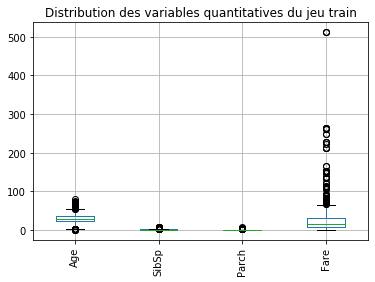

In [21]:
# On identifie et on retire les valeurs atypiques qui faussent les estimations
train[['Age','SibSp','Parch','Fare']].boxplot(rot=90)
plt.title("Distribution des variables quantitatives du jeu train")
plt.show()

Il semble y avoir beaucoup de valeurs atypiques mais l'échelle n'étant pas la même entre les 4 variables il est difficile d'identifier le nombre exact d'outliers. Nous "zoomons" sur la première, les 2 du milieu puis la dernière.

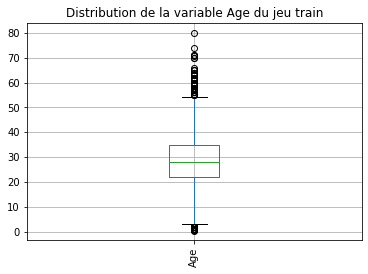

In [22]:
# On regarde le boxplot de l'âge
train[['Age']].boxplot(rot=90)
plt.title("Distribution de la variable Age du jeu train")
plt.show()

Pas de valeurs aberrantes : les âges vont de 0 à 80 ans ce qui est normal.

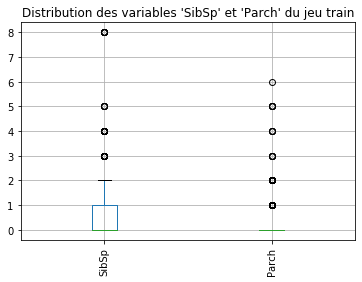

In [23]:
# Puis le boxplot de 'SibSp' et 'Parch'
train[['SibSp','Parch']].boxplot(rot=90)
plt.title("Distribution des variables 'SibSp' et 'Parch' du jeu train")
plt.show()

In [24]:
outlier_Sibsp=train[(train['SibSp']==8)].iloc[0]
outlier_Sibsp.shape

(11,)

In [25]:
moy=sum(train.SibSp)/len(train.SibSp)
print("Le nombre moyen de proches pour un passager est de",moy)

Le nombre moyen de proches pour un passager est de 0.5241844769403825


On voit à partir du boxplot ci-dessus et du calcul, que 11 passagers du jeu train étaient venu à bord avec 8 frères et soeurs/épouses et consituent des valeurs atypiques puisqu'en moyenne les personnes venaient seules ou avec 1 proche (moyenne=0.52)

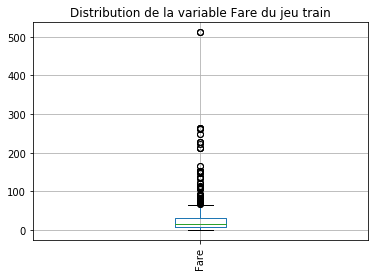

32.09668087739029

In [26]:
train[['Fare']].boxplot(rot=90)
plt.title("Distribution de la variable Fare du jeu train")
plt.show()
train.Fare.mean()

In [27]:
# on trouve le nombre de valeurs atypiques pour cette variable
Outlier_fare_train=train[(train['Fare']>500)].iloc[0]
Outlier_fare_train

Survived                   1
Pclass                     1
Name        Ward, Miss. Anna
Sex                   female
Age                       35
SibSp                      0
Parch                      0
Ticket              PC 17755
Fare                 512.329
Cabin                    NaN
Embarked                   C
Name: 259, dtype: object

On observe au moins 2 valeurs atypiques à retirer qui correspondent à des billets à plus de 500\\$ tandis que la plupart des tarifs étaient inférieurs à 100\\$.

Maintenant que l'on a identifié les observations abérrantes on les **retire** de la base d'apprentissage.

In [28]:
train = train[train.SibSp<6]
train = train[train.Fare<300]
print("La base train contient à présent", train.shape[0], "observations soit", 891-train.shape[0], "de moins qu'à l'import, et", train.shape[1], "colonnes.")

La base train contient à présent 879 observations soit 12 de moins qu'à l'import, et 11 colonnes.


## Statistiques descriptives

### Répartition des individus dans les modalités

In [29]:
# Répartition des passagers
train['Survived'].value_counts()

0    542
1    337
Name: Survived, dtype: int64

In [30]:
train['Pclass'].value_counts()

3    484
1    211
2    184
Name: Pclass, dtype: int64

In [31]:
train['Sex'].value_counts()

male      571
female    308
Name: Sex, dtype: int64

In [32]:
train['Embarked'].value_counts()

S    637
C    165
Q     77
Name: Embarked, dtype: int64

Avant toute analyse il est important de regarder les répartitions des individus (les 879 passagers du jeu train nettoyé) au sein de chaque modalité des variables qualitatives pour vérifier la répartition. Les personnes ayant survécues sont au nombre de 337 et représentent ainsi 38.3% de la base, pareillement on voit que la majorité des personnes étaient en troisème classe (484 soit 55%) et les passagers en première classe étaient les moins nombreux avec 184 personnes pour un taux de 20.9%. 
Un autre constat peut être celui de la répartition des sexes dans les individus de la base 'train' : il y a 571 hommes contre 308 femmes tous âges confondus, donc si l'échantillon de notre base correspond à la vraie répartition des passagers lors du voyage de 1912, les hommes étaient près de 2 fois plus que les femmes.
Enfin, sur la répartition du port d'embarquement on voit que 72% des personnes sont montées au port de Southampton, 19% à Queenstown et le reste à Cherbourg.

### La variable à expliquer : "Survived"

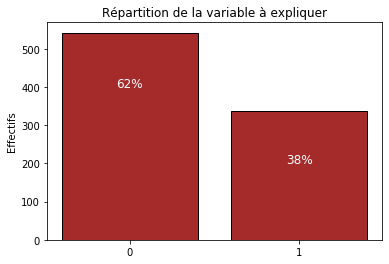

In [33]:
plt.bar(
    train.Survived.value_counts().index,
    train.Survived.value_counts().values, color='brown', edgecolor='black'
)
plt.title("Répartition de la variable à expliquer")
plt.ylabel('Effectifs')
plt.xticks([0,1])
plt.text(0,400,'62%',horizontalalignment = 'center', color="white",size=12)
plt.text(1,200,'38%',horizontalalignment = 'center', color="white",size=12)
plt.show()

### Les variables explicatives

Dans cette sous partie nous allons traiter les variables explicatives avant de les inclures dans nos modèles. Nous allons commencer par observer la distribution de chaque variable en fonction de celle à expliquer (Survived). Pour les variables explicatives quantitatives nous étudierons les correlations entre elles afin de ne pas biaiser nos estimations (pour les modèles linéaires tels que la regression logistique). Pour les variables categorielles nous créérons des variables dummies, c'est une méthode parmis d'autres pour inclure des variables qualitatives dans les modèles. 

#### VARIABLES QUANTITATIVES

In [34]:
#On sépare le jeu de données en deux populations (survivant ou non)
survived = train[train.Survived == 1]
dead = train[train.Survived == 0]

+ **Age** 

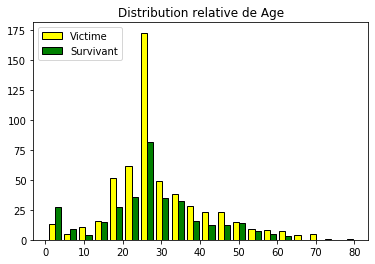

In [35]:
def plot_hist(feature, bins = 20):
    plt.hist([dead[feature], survived[feature]], label=['Victime', 'Survivant'], bins = bins, color = ['yellow', 'green'], edgecolor='black')
    plt.legend(loc = 'upper left')
    plt.title('Distribution relative de %s' %feature)
    plt.show()
    
plot_hist('Age')

Le plot ci-dessus nous apporte plusieurs informations concernant l'**âge** des passagers :
* premièrement que la classe d'âge 20 - 35 ans est la plus représentée dans l'échantillon, on voit un pic d'effectifs entre 24 et 26 ans avec plus de 250 passagers concernés, soit près de 30% de la base train. 

* Deuxièment quil y a eu une forte proportion de victimes chez les jeunes adultes entre 20 et 30 ans. 

Enfin, on voit ainsi que parmis les enfants de moins de 8 ans il y a beaucoup de survivants en proportion. Nous créons donc une nouvelle variable qui indique si l'individu est un enfant (moins de 8 ans) ou non.

In [36]:
train['is_child'] = train.Age < 8
test['is_child'] = test.Age < 8

In [37]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,is_child
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,False
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,False
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,False
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,False


+ **SibSp** 

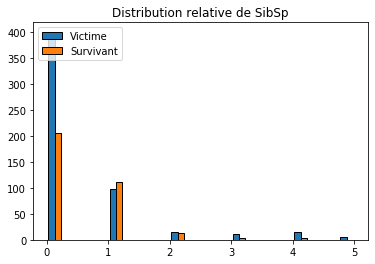

In [39]:
def plot_hist(feature, bins = 20):
    plt.hist([dead[feature], survived[feature]], label=['Victime', 'Survivant'], bins = bins, edgecolor='black')
    plt.legend(loc = 'upper left')
    plt.title('Distribution relative de %s' %feature)
    plt.show()
    
plot_hist('SibSp')

La variable **SibSp** nous indique le nombre de membre de la famille (frère et soeurs, époux) du passager. Le graphique précedant nous montre que la majorité des victimes étaient des individus voyageant seuls. Nous avons fait le choix de la concerver tel quel pour l'estimation des modèles. 

+ **Parch**

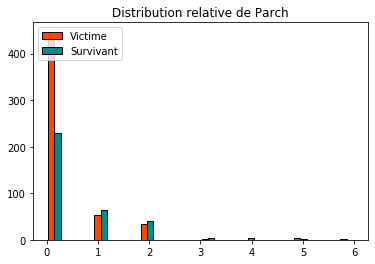

In [40]:
def plot_hist(feature, bins = 20):
    plt.hist([dead[feature], survived[feature]], label=['Victime', 'Survivant'], bins = bins, color = ['orangered', 'darkcyan'], edgecolor='black')
    plt.legend(loc = 'upper left')
    plt.title('Distribution relative de %s' %feature)
    plt.show()
    
plot_hist('Parch')

La variable **Parch** indique aussi le nombre de membre de la famille (père, mère, fils, filles) du passager. Elle est quasiment identique à la précedente. Elles seront surement corrélé entre elles donc nous la retirerons probablement lors des estimations.

+ **Fare**

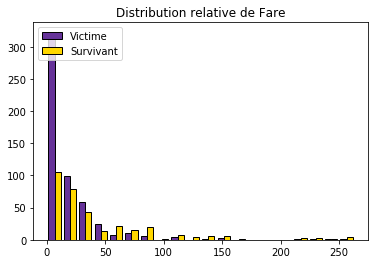

In [41]:
def plot_hist(feature, bins = 20):
    plt.hist([dead[feature], survived[feature]], label=['Victime', 'Survivant'], bins = bins, color = ['rebeccapurple', 'gold'], edgecolor='black')
    plt.legend(loc = 'upper left')
    plt.title('Distribution relative de %s' %feature)
    plt.show()
    
plot_hist('Fare') 

**Fare** est le prix du ticket, on peut voir que les personnes ayant payé peu cher leur billet pour la traversée sont aussi celles qui ont le moins survécu. On constate donc tristement que l'argent a dicté l'importance des passagers, puisque ce sont les plus riches qui ont été sauvés en premier. 

+ **Corrélations**

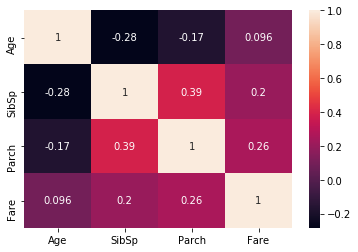

In [42]:
# Matrice de co
df_corr = train[['Age','SibSp','Parch','Fare']].corr()
sns.heatmap(df_corr,annot = True)

La matrice de coorélation entre les variables explicatives de type quantitatives confirme notre intuition d'une corrélation entre les variables **SibSp** et **Parch**, cependant comme le CC est inférieur à 0.5 nous pouvons garder les 2 dans les modélisations.

In [43]:
pd.pivot_table(train, index = 'Survived', values = ['Age','SibSp','Parch','Fare'])

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.054428,21.505295,0.308118,0.457565
1,28.099911,44.077869,0.468843,0.480712


On peut constater que les plus jeunes ont davantage survécu, les plus riches aussi (prix moyen des billets des survivants>prix des décès : variable 'Fare'), et enfin les passagers ayant beaucoup de proches à bord (donc les familles, cela rejoint la plus grande survie des plus jeunes que l'on vient de noter).

####  VARIABLES QUALITATIVES

Nous allons maintenant tenter de comprendre un peu plus les variables de types qualitatives présentes dans la base, d'une manière visuelle dans un premier temps. Enfin nous procederons à la transformation des variables en 'dummies'.

+ **Sex**

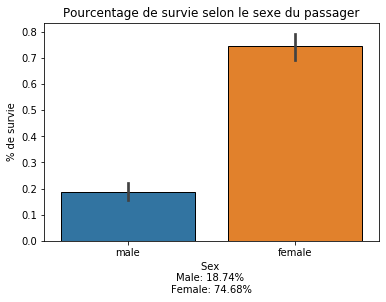

In [44]:
sns.barplot(x="Sex", y="Survived", data=train, edgecolor='black')

female = train['Survived'][train['Sex']=='female'].value_counts(normalize=True)[1]*100
male = train['Survived'][train['Sex']=='male'].value_counts(normalize=True)[1]*100
plt.title("Pourcentage de survie selon le sexe du passager")
plt.ylabel("% de survie")
plt.xlabel('Sex \nMale: %.2f%% \nFemale: %.2f%%'%(male, female) )
plt.show()

Selon le barplot ci-dessus, 75% des femmes présentes à bord ont survécues au naufrage, pour les hommes ce pourcentage n'est que de 18.74%. Cela est compréhensible sachant que les femmes et les enfants étaient prioritaires lors de l'embarcation dans les cannots de sauvetage.

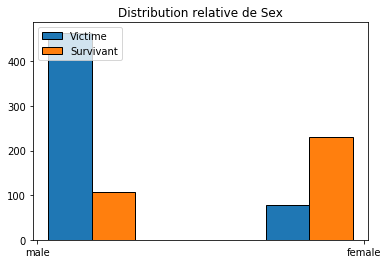

In [45]:
def plot_hist(feature, bins = 3):
    plt.hist([dead[feature], survived[feature]], label=['Victime', 'Survivant'], bins = bins, edgecolor='black')
    plt.legend(loc = 'upper left')
    plt.title('Distribution relative de %s' %feature)
    plt.show()
    
plot_hist('Sex')

Il y avait une majorité d'homme sur le bateau, mais la proportion de survivants est très inégalement répartie.

+ **Pclass**

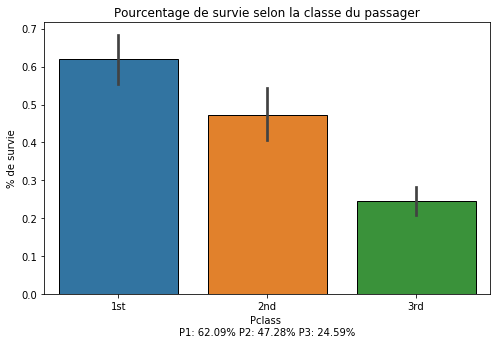

In [46]:
plt.subplots(figsize = (8,5))
sns.barplot(x = "Pclass", y = "Survived", data=train, edgecolor='black')
plt.title("Pclass Distribution - Survived vs Non-Survived")
 
plt.xticks([0,1,2], ['1st', '2nd', '3rd'])

P1= train["Survived"][train["Pclass"] == 1].value_counts(normalize = True)[1]*100
P2= train["Survived"][train["Pclass"] == 2].value_counts(normalize = True)[1]*100
P3= train["Survived"][train["Pclass"] == 3].value_counts(normalize = True)[1]*100

plt.xlabel('Pclass \nP1: %.2f%% P2: %.2f%% P3: %.2f%%'%(P1, P2, P3))
plt.ylabel("% de survie")
plt.title("Pourcentage de survie selon la classe du passager")

plt.show()

De même, on voit que les personnes ayant payé plus cher leur billet càd ceux en 1ère classe ont survécu à 62%, tandis que seul 1 voyageur de 3è classe sur 4 a survécu.

+ **Embarked**

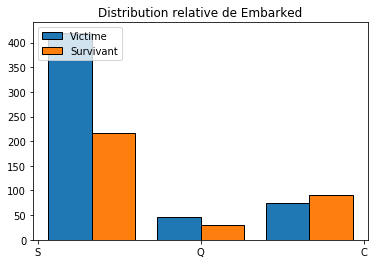

In [47]:
def plot_hist(feature, bins = 3):
    plt.hist([dead[feature], survived[feature]], label=['Victime', 'Survivant'], bins = bins, edgecolor='black')
    plt.legend(loc = 'upper left')
    plt.title('Distribution relative de %s' %feature)
    plt.show()
    
plot_hist('Embarked')

La variable **Embarked** indique le port d'embarquement du passager entre "C" pour Cherbourg, "Q" pour Queenstown et enfin "S" pour Southampton. L'histogramme montre que les majorité des passagers avait emarqué à Southampton et se sont eux qui ont été les principales victimes du naufrage.

### Création de variables

Les variables **Name** ou encore **Cabin** sont des variables que nous avons choisi de laisser de côté dans un premier temps car:
* Pour 'Name', nous ne savions pas trop comment traiter des chaînes de caractères.
* Pour 'Cabin', avec entre 70 et 80% de valeurs manquantes nous avions décidé dans un premier temps de la supprimer.

Nous avons ensuite essayé de voir si nous pouvions obtenir de l'information à partir de celles-ci.

+ **Name**

In [48]:
train['Name'].head(15)

PassengerId
1                               Braund, Mr. Owen Harris
2     Cumings, Mrs. John Bradley (Florence Briggs Th...
3                                Heikkinen, Miss. Laina
4          Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                              Allen, Mr. William Henry
6                                      Moran, Mr. James
7                               McCarthy, Mr. Timothy J
8                        Palsson, Master. Gosta Leonard
9     Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
10                  Nasser, Mrs. Nicholas (Adele Achem)
11                      Sandstrom, Miss. Marguerite Rut
12                             Bonnell, Miss. Elizabeth
13                       Saundercock, Mr. William Henry
14                          Andersson, Mr. Anders Johan
15                 Vestrom, Miss. Hulda Amanda Adolfina
Name: Name, dtype: object

On peut constater que pour chaque passagers il y a le "titre" de l'individu (Mrs, Mr, Miss etc) ce qui pourrait nous renseigner sur la situation du passager (surement corrélée avec les variables 'Sexe' et 'Pclass'). Nous avons donc décidé de créé une nouvelle variable **title** contenant seulement le titre du passager. Pour cela nous utiliserons la fonction suivante :

In [49]:
# Création de la variable
train['title'] = train['Name'].map(lambda x : x.split(',')[1].split('.')[0])#La variable 'title' que l'on créé à partir de 'Name'
test['title'] = test['Name'].map(lambda x : x.split(',')[1].split('.')[0])

In [50]:
# Répartition des observations pour chaque titre
train['title'].value_counts()

 Mr              512
 Miss            177
 Mrs             124
 Master           39
 Dr                7
 Rev               6
 Major             2
 Mlle              2
 Col               2
 Sir               1
 Lady              1
 Don               1
 Ms                1
 the Countess      1
 Mme               1
 Capt              1
 Jonkheer          1
Name: title, dtype: int64

In [51]:
test['title'].value_counts()

 Mr        240
 Miss       78
 Mrs        72
 Master     21
 Rev         2
 Col         2
 Ms          1
 Dr          1
 Dona        1
Name: title, dtype: int64

+ **Cabin**

In [52]:
train['Cabin'].head(15)

PassengerId
1      NaN
2      C85
3      NaN
4     C123
5      NaN
6      NaN
7      E46
8      NaN
9      NaN
10     NaN
11      G6
12    C103
13     NaN
14     NaN
15     NaN
Name: Cabin, dtype: object

Lorsqu'il n'y a pas de NaN, La variable **Cabin** donne toujours une lettre puis un nombre. Après quelques recherches il s'est avéré que la lettre correspondait au 'pont', et le nombre au numéro de cabine. Le nauffrage s'est déroulé dans la nuit du 14 au 15 avril 1912 ce qui signifie que les passagers étaient sûrement dans leur cabine à l'heure où le navire à percuté l'iceberg. Les différentes distances entre les cabines et les canots de sauvetage ont dû déterminer le sort des passagers. Nous avons donc supposé que les passagers des cabines éloignées du pont des canots de sauvetage ont eu moins de chance de s'en sortir vivants.

In [53]:
train['Cabin'] = train.Cabin.map(lambda x : x[0] if not pd.isnull(x) else -1)
test['Cabin'] = test.Cabin.map(lambda x : x[0] if not pd.isnull(x) else -1)

In [54]:
train['Cabin'].value_counts()

-1    679
C      59
B      43
D      33
E      32
A      15
F      13
G       4
T       1
Name: Cabin, dtype: int64

+ **PREPARATION DE LA BASE AVANT MODELISATIONS**

**On met au bon format les variables**

In [55]:
# on définit les colonnes et les transformations pour 
# les colonnes quantitatives/variables qualitatives
col_quanti = ['Age', 'SibSp', 'Parch', 'Fare']
col_quali = ['Survived', 'Pclass', 'Sex' , 'Cabin', 'Embarked', 'is_child','title']

In [56]:
# On recode les différentes variables
#train['Sex'] = coding(col=train['Sex'], codeDict={'female':0,'male':1})
#train['Embarked'] = coding(col=train['Embarked'], codeDict={'S':0,'C':1, 'Q':2})
#train['is_child'] = coding(col=train['is_child'], codeDict={'False':0,'True':1})

In [57]:
# On retire les colonnes en trop dans les 2 jeux 
train.drop(['Name', 'Ticket'], axis='columns', inplace=True)
test.drop(['Name', 'Ticket'], axis='columns', inplace=True)

In [58]:
train.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Cabin        object
Embarked     object
is_child       bool
title        object
dtype: object

In [59]:
# Variables quali
train['Survived']=train['Survived'].astype(np.object)
train['Pclass']=train['Pclass'].astype(np.object)
train['is_child']=train['is_child'].astype(np.object)
# Variables quanti déjà au bon format

In [60]:
# Vérification des format
train.dtypes

Survived     object
Pclass       object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Cabin        object
Embarked     object
is_child     object
title        object
dtype: object

**On créé 2 df avec Y d'une part et les Xi de l'autre**

In [61]:
#On sépare Y et X 
Y = pd.DataFrame(train['Survived'])
train.drop(['Survived'], axis='columns', inplace=True)
X = train
col = X.columns

In [62]:
X   # indice des passagers va jusqu'à 891 mais 879 observations en réalité (depuis suppression NA et outliers)

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,is_child,title
PassengerId,,,,,,,,,,
1,3,male,22.0,1,0,7.2500,-1,S,False,Mr
2,1,female,38.0,1,0,71.2833,C,C,False,Mrs
3,3,female,26.0,0,0,7.9250,-1,S,False,Miss
4,1,female,35.0,1,0,53.1000,C,S,False,Mrs
5,3,male,35.0,0,0,8.0500,-1,S,False,Mr
...,...,...,...,...,...,...,...,...,...,...
887,2,male,27.0,0,0,13.0000,-1,S,False,Rev
888,1,female,19.0,0,0,30.0000,B,S,False,Miss
889,3,female,28.0,1,2,23.4500,-1,S,False,Miss


**On standardise les variables quantitatives**

In [63]:
X_quanti = pd.DataFrame(X[['Age', 'SibSp', 'Parch', 'Fare']])
X_quanti

,Age,SibSp,Parch,Fare
PassengerId,,,,
1,22.0,1,0,7.2500
2,38.0,1,0,71.2833
3,26.0,0,0,7.9250
4,35.0,1,0,53.1000
5,35.0,0,0,8.0500
...,...,...,...,...
887,27.0,0,0,13.0000
888,19.0,0,0,30.0000
889,28.0,1,2,23.4500


In [64]:
from sklearn import preprocessing
X_scaled_train = preprocessing.scale(X_quanti)
X_scaled_train = pd.DataFrame(X_scaled_train, columns=['Age', 'SibSp', 'Parch', 'Fare'])
X_scaled_train.shape

(879, 4)

**On rassemble le tout en un df 'train'**

In [65]:
# Y et X avec variables quanti non standardisées
train = pd.merge(Y, X, on='PassengerId')
train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,is_child,title
PassengerId,,,,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,-1,S,False,Mr
2,1,1,female,38.0,1,0,71.2833,C,C,False,Mrs
3,1,3,female,26.0,0,0,7.9250,-1,S,False,Miss
4,1,1,female,35.0,1,0,53.1000,C,S,False,Mrs
5,0,3,male,35.0,0,0,8.0500,-1,S,False,Mr
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,male,27.0,0,0,13.0000,-1,S,False,Rev
888,1,1,female,19.0,0,0,30.0000,B,S,False,Miss
889,0,3,female,28.0,1,2,23.4500,-1,S,False,Miss


In [66]:
# On supprime les quanti non standardisées pour les remplacer par les nouvelles, et on supprime l'indice temporairement pour merger ensuite avec les nouvelles valeurs
train = train.drop(train[['Age', 'SibSp', 'Parch', 'Fare']], axis='columns')
train.reset_index(inplace=True)
train

,PassengerId,Survived,Pclass,Sex,Cabin,Embarked,is_child,title
0,1,0,3,male,-1,S,False,Mr
1,2,1,1,female,C,C,False,Mrs
2,3,1,3,female,-1,S,False,Miss
3,4,1,1,female,C,S,False,Mrs
4,5,0,3,male,-1,S,False,Mr
...,...,...,...,...,...,...,...,...
874,887,0,2,male,-1,S,False,Rev
875,888,1,1,female,B,S,False,Miss
876,889,0,3,female,-1,S,False,Miss
877,890,1,1,male,C,C,False,Mr


In [67]:
# On remet le tout ensemble puis on réindice
frames = [train,X_scaled_train]
train = pd.concat(frames, axis=1)
train.set_index('PassengerId',inplace=True,drop=True)
train

,Survived,Pclass,Sex,Cabin,Embarked,is_child,title,Age,SibSp,Parch,Fare
PassengerId,,,,,,,,,,,
1,0,3,male,-1,S,False,Mr,-0.559951,0.603637,-0.463711,-0.556766
2,1,1,female,C,C,False,Mrs,0.666484,0.603637,-0.463711,0.999433
3,1,3,female,-1,S,False,Miss,-0.253342,-0.527700,-0.463711,-0.540362
4,1,1,female,C,S,False,Mrs,0.436528,0.603637,-0.463711,0.557525
5,0,3,male,-1,S,False,Mr,0.436528,-0.527700,-0.463711,-0.537324
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,male,-1,S,False,Rev,-0.176690,-0.527700,-0.463711,-0.417024
888,1,1,female,B,S,False,Miss,-0.789907,-0.527700,-0.463711,-0.003874
889,0,3,female,-1,S,False,Miss,-0.100038,0.603637,2.044607,-0.163058


Notre base train est donc enfin prête pour les estimations !

+ On fait rapidement la même chose pour la base **test**

In [68]:
X_quanti = pd.DataFrame(test[['Age', 'SibSp', 'Parch', 'Fare']])
X_scaled_test = preprocessing.scale(X_quanti)
X_scaled_test = pd.DataFrame(X_scaled_test, columns=['Age', 'SibSp', 'Parch', 'Fare'])
test = test.drop(train[['Age', 'SibSp', 'Parch', 'Fare']], axis='columns')
test.reset_index(inplace=True)
frames = [test,X_scaled_test]
test = pd.concat(frames, axis=1)
test.set_index('PassengerId',inplace=True,drop=True)
test

,Pclass,Sex,Cabin,Embarked,is_child,title,Age,SibSp,Parch,Fare
PassengerId,,,,,,,,,,
892,3,male,-1,Q,False,Mr,0.386231,-0.499470,-0.400248,-0.498407
893,3,female,-1,S,False,Mrs,1.371370,0.616992,-0.400248,-0.513274
894,2,male,-1,Q,False,Mr,2.553537,-0.499470,-0.400248,-0.465088
895,3,male,-1,S,False,Mr,-0.204852,-0.499470,-0.400248,-0.483466
896,3,female,-1,S,False,Mrs,-0.598908,0.616992,0.619896,-0.418471
...,...,...,...,...,...,...,...,...,...,...
1305,3,male,-1,S,False,Mr,-0.204852,-0.499470,-0.400248,-0.494448
1306,1,female,C,C,False,Dona,0.740881,-0.499470,-0.400248,1.313753
1307,3,male,-1,S,False,Mr,0.701476,-0.499470,-0.400248,-0.508792


## Modélisations

* Dans cette partie nous allons procéder aux différentes techniques de ML afin de prédire le nombre de survivants du Titanic. On doit pour cela standardiser les variables quantitatives et catégoriser les qualitatives (dummies), ce que nous ferrons en rassemblant les observations des jeux train et test dans un seul dataframe que nous rediviserons ensuite. Le but en effet est d'avoir les mêmes colonnes pour éviter tout problème lors de l'application du modèle construit sur le jeu test. 


In [69]:
# On passe les jeux en df et on enlève Y pour avoir les mêmes colonnes
train = pd.DataFrame(train)
train1 = train.drop(["Survived"],axis = 1)
test = pd.DataFrame(test)

In [70]:
# On rassemble train et test en mettant les observations à la suite
transform = [train1,test]
transform = pd.concat(transform, axis=0)

# On passe les quali en catégorie
transform["Pclass"] = transform["Pclass"].astype('category')
transform["Sex"] = transform["Sex"].astype('category')
transform["Cabin"] = transform["Cabin"].astype('category')
transform["Embarked"] = transform["Embarked"].astype('category')
transform["is_child"] = transform["is_child"].astype('category')
transform["title"] = transform["title"].astype('category')
transform.dtypes

Pclass      category
Sex         category
Cabin       category
Embarked    category
is_child    category
title       category
Age          float64
SibSp        float64
Parch        float64
Fare         float64
dtype: object

In [71]:
# On fait des dummies des variables quali
import numpy as np
transform1=pd.get_dummies(transform[["Pclass","Sex","Cabin","Embarked","is_child","title"]],drop_first = True)
transform2=[transform1, transform[["Age","SibSp","Parch","Fare"]]]
transform_final=pd.concat(transform2, axis=1)

In [72]:
# On redivise les df
X_train=transform_final.loc[1:891]
X_test=transform_final.loc[892:1309]

In [73]:
# On garde Y
Survived=train[['Survived']]
Y = pd.DataFrame(Survived)

### LogisticRegression

Nous allons commencer l'estimation de nos modèles par le modèle logistique. 

In [74]:
# On prépare la base aux différents modèles
Y1 = pd.get_dummies(Y.Survived,drop_first = True)
Y1.to_numpy()
np.ravel(Y1)
Y1.dtypes

1    uint8
dtype: object

In [75]:
# On applique la regression logistique
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
lr = LogisticRegression()
lr.fit(X_train, Y1.values.ravel())

# On regarde le taux de bien prédit en cross validation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lr, X_train, Y1.values.ravel(), cv=3, scoring='f1_macro')
print(scores)
print("Cross-Validation score : ", np.mean(scores))

# Le même taux sur l'échantillon d'apprentissage (donc le modèle est testé sur les données sur lesquelles il s'est entraîné)
print("Train F1-score : {}".format(
    f1_score(Y1.values.ravel(), lr.predict(X_train), average='macro')
))

[0.79142782 0.80420255 0.83672746]
Cross-Validation score :  0.8107859444183666
Train F1-score : 0.827125714665603


### Arbre de décision

In [76]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, Y1.values.ravel())

scores = cross_val_score(clf, X_train, Y1.values.ravel(), cv=3, scoring='f1_macro')
print("Cross-Validation score : ", np.mean(scores))

print("Train F1-score : {}".format(
    f1_score(Y1.values.ravel(), clf.predict(X_train), average='macro')
))

Cross-Validation score :  0.7499310144341131
Train F1-score : 0.9830391205592433


On voit qu'il y a beaucoup de sur-apprentissage puisque les taux d'erreur entre un échantillon connu (Train) et un inconnu (CV) l'écart est près de 15%. Si nous modifions les paramètres de l'arbre de telle manière qu'il n'y ait pas de sur apprentissage on voit que l'écart se réduit énormement ; notre modèle est donc plus robuste. 

In [77]:
# CART avec les paramètres modifiés
clf = DecisionTreeClassifier(max_depth = 20,
                             min_samples_split = 0.3,
                             class_weight = "balanced",
                             random_state=0)

clf.fit(X_train, Y1.values.ravel())

scores = cross_val_score(clf, X_train, Y1.values.ravel(), cv=3, scoring='f1_macro')
print("Cross-Validation score : ", np.mean(scores))

print("Train F1-score : {}".format(
    f1_score(Y1.values.ravel(), clf.predict(X_train), average='macro')
))

Cross-Validation score :  0.7502915116403254
Train F1-score : 0.7775019119120197


L'écart passe de 15 à 2%, ça a donc été utile.

### Forêt aléatoire

In [78]:
# Modèle de random forest
from sklearn.ensemble import RandomForestClassifier

rd = RandomForestClassifier(random_state=0)
rd.fit(X_train, Y1.values.ravel())

scores = cross_val_score(rd, X_train, Y1.values.ravel(), cv=3, scoring='f1_macro')
print("Cross-Validation score : ", np.mean(scores))

print("Train F1-score : {}".format(
    f1_score(Y1.values.ravel(), rd.predict(X_train), average='macro')
))

Cross-Validation score :  0.7784621868906862
Train F1-score : 0.9830989397352083


In [79]:
# Ici encore le sur-apprentissage nous amène à modifier les paramètres
rd = RandomForestClassifier(n_estimators = 50,
                             max_depth = 7,
                             min_samples_split = 0.03,
                             class_weight = "balanced",
                             random_state=0)
rd.fit(X_train, Y1.values.ravel())

scores = cross_val_score(rd, X_train, Y1.values.ravel(), cv=3, scoring='f1_macro')
print("Cross-Validation score : ", np.mean(scores))

print("Train F1-score : {}".format(
    f1_score(Y1.values.ravel(), rd.predict(X_train), average='macro')
))

Cross-Validation score :  0.7982771336542894
Train F1-score : 0.8247377908882334


On arrive ainsi à résoudre l'**overfitting**.

### Bagging

In [80]:
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
bag = BaggingClassifier(base_estimator=RandomForestClassifier(), random_state=0)
bag.fit(X_train, Y1.values.ravel())

scores = cross_val_score(bag, X_train, Y1.values.ravel(), cv=3, scoring='f1_macro')
print("Cross-Validation score : ", np.mean(scores))

print("Train F1-score : {}".format(
    f1_score(Y1.values.ravel(), bag.predict(X_train), average='macro')
))

Cross-Validation score :  0.8072098019744498
Train F1-score : 0.9382507903055849


 On voit 13 points de pourcentage d'écart entre la CV et les données d'apprentissage. Le taux de bonnes prédictions a dépassé les 80%.

### Gradient boosting

In [81]:
from sklearn.ensemble import GradientBoostingClassifier
boo = GradientBoostingClassifier(n_estimators=200, learning_rate=1.0, max_depth=4, random_state=0)
boo.fit(X_train, Y1.values.ravel())

scores = cross_val_score(boo, X_train, Y1.values.ravel(), cv=3, scoring='f1_macro')
print("Cross-Validation score : ", np.mean(scores))

print("Train F1-score : {}".format(
    f1_score(Y1.values.ravel(), boo.predict(X_train), average='macro')
))

Cross-Validation score :  0.7824637102213504
Train F1-score : 0.9831184152765584


+ On essaye une **optimisation** avec Grid Search pour ce modèle de gradient boosting

In [82]:
from sklearn.model_selection import GridSearchCV

n_estimators = [5,10,20,40,80,100,150,200,400]
max_depth = [3, 4, 5, 10, 20, 30, 50]
learning_rate = [0.03, 0.05, 0.1, 0.2, 0.4, 0.5, 0.8, 0.95, 1]

parameters = {'n_estimators': n_estimators ,
              'max_depth' : max_depth,
              'learning_rate' : learning_rate
             }

boo2 = GradientBoostingClassifier()

boo2 = GridSearchCV(boo2, parameters, scoring = 'f1_macro', cv = 3)
boo2.fit(X_train, Y1.values.ravel())

GridSearchCV(cv=3, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_c...
                 

In [83]:
#Avec une fonction on trouve les paramètres qui optimisent
meilleure_qualite = boo2.best_score_
meilleurs_hyperparam = boo2.best_params_

print("la meilleure qualité de prévision est {0} correspondant aux hyper paramètres {1}".format(meilleure_qualite, meilleurs_hyperparam))

la meilleure qualité de prévision est 0.8248463500150379 correspondant aux hyper paramètres {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 200}


## Meilleur modèle

Enfin, nous terminons cette étude en regardant les variables importantes pour répodnre réellement à la problématique : "Quels types de personnes étaient plus susceptibles de survivre?". Nous utilisons donc la fonction **feature_importances_** qui indique les facteurs importants du meilleur modèle, c'est-à-dire le modèle de gradient boosting avec les hyperparamètres optimisés.

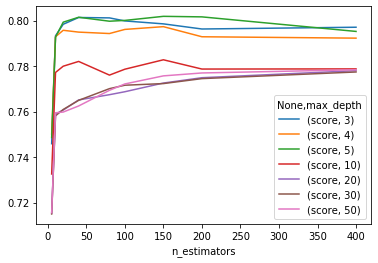

In [84]:
gridsearch_result = pd.DataFrame(boo2.cv_results_["params"])
gridsearch_result["score"] = boo2.cv_results_["mean_test_score"]
gridsearch_result[["n_estimators","max_depth","score"]].groupby(["n_estimators","max_depth"]).mean().unstack().plot()

In [85]:
boo_final = boo2.best_estimator_
print(boo_final.set_params)

<bound method BaseEstimator.set_params of GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.05, loss='deviance', max_depth=5,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=200,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)>


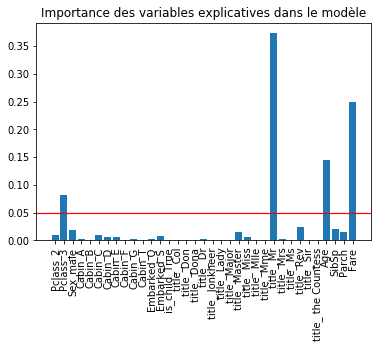

In [86]:
var_explicative=list(X_train)

plt.bar(
    var_explicative,
    boo_final.feature_importances_
)
plt.xticks(rotation=90)
plt.title("Importance des variables explicatives dans le modèle")
plt.axhline(y=0.05, xmin=0, xmax=1, color='red', lw=1.2)
plt.show()

+ Pour connaître **l'effet de chaque variable** sur Y et ainsi répondre pleinement à la problématique, nous regardons les coefficients associés à chaque variable de la régression logistique (les autres modèles étant de ML nous ne pouvons obtenir de coefficients).

In [87]:
# On récupère les coef et noms de variables
x1=lr.coef_
x11=pd.DataFrame(x1)
x111=np.transpose(x11)
x2=X_train.columns
x22=pd.DataFrame(x2)

In [88]:
# On met le tout dans un df
vbles=[x22,x111]
vbles1=pd.concat(vbles, axis=1)
vbles1.columns = ['Variables', 'Coefficients']

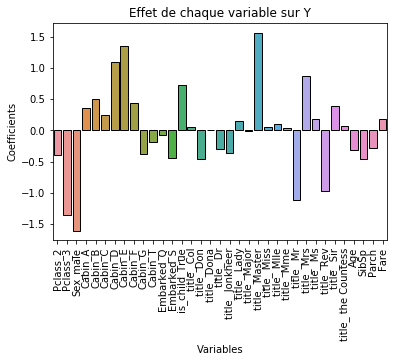

In [90]:
sns.barplot(x="Variables", y="Coefficients", data=vbles1, edgecolor='black')
#female = train['Survived'][train['Sex']=='female'].value_counts(normalize=True)[1]*100
#male = train['Survived'][train['Sex']=='male'].value_counts(normalize=True)[1]*100
plt.title("Effet de chaque variable sur Y")
plt.ylabel("Coefficients")
plt.xticks(rotation=90)
#plt.xlabel('Sex \nMale: %.2f%% \nFemale: %.2f%%'%(male, female) )
plt.show()

+ Finalement, on applique le modèle retenu sur le jeu de données test pour obtenir les prédictions du jeu test. 

In [ ]:
# On applique au jeu test et on exporte
X_test=transform_final.loc[892:1309]
result=boo_final.predict(X_test)
result=pd.DataFrame(result)

In [ ]:
# On ajoute le passagerId pour la soumission sous kaggle
test.reset_index(inplace=True)
kaggle=[test.PassengerId,result]
gender_submission=pd.concat(kaggle, axis=1)
gender_submission.set_index('PassengerId',inplace=True,drop=True)
gender_submission.to_csv("gender_submission.csv", encoding="utf-8", index=True)

 Avec ce modèle on obtient un score sous kaggle de 0.7488.